# (D) The Two-Body Problem

In [2]:
# This cell runs the file "Two_body_functions.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functions.ipynb

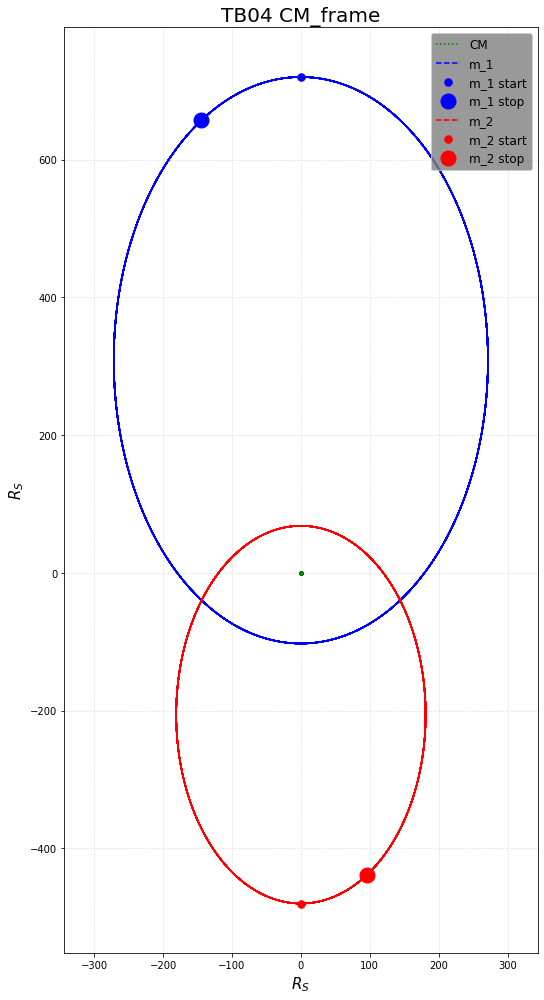

In [3]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max = 1500000, dt = 10)
# twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=False, show=False)
twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=False, show=True)
# prettyTwoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=False)

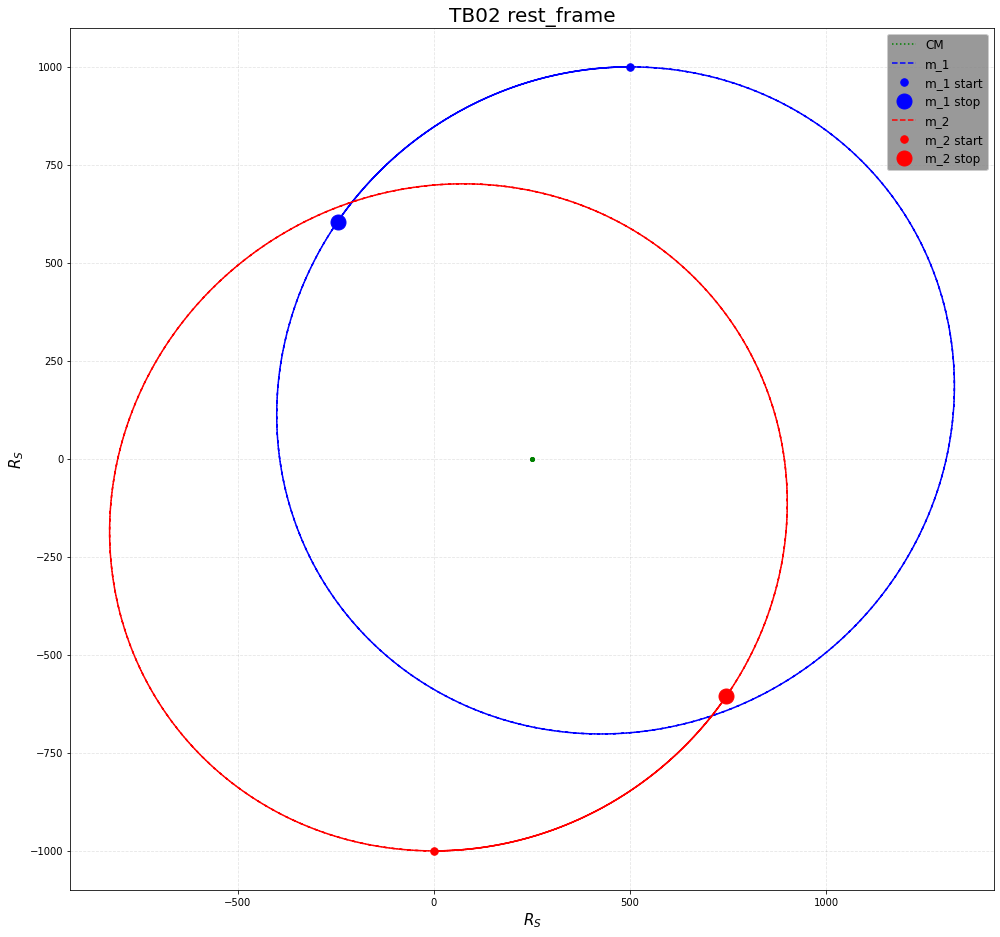

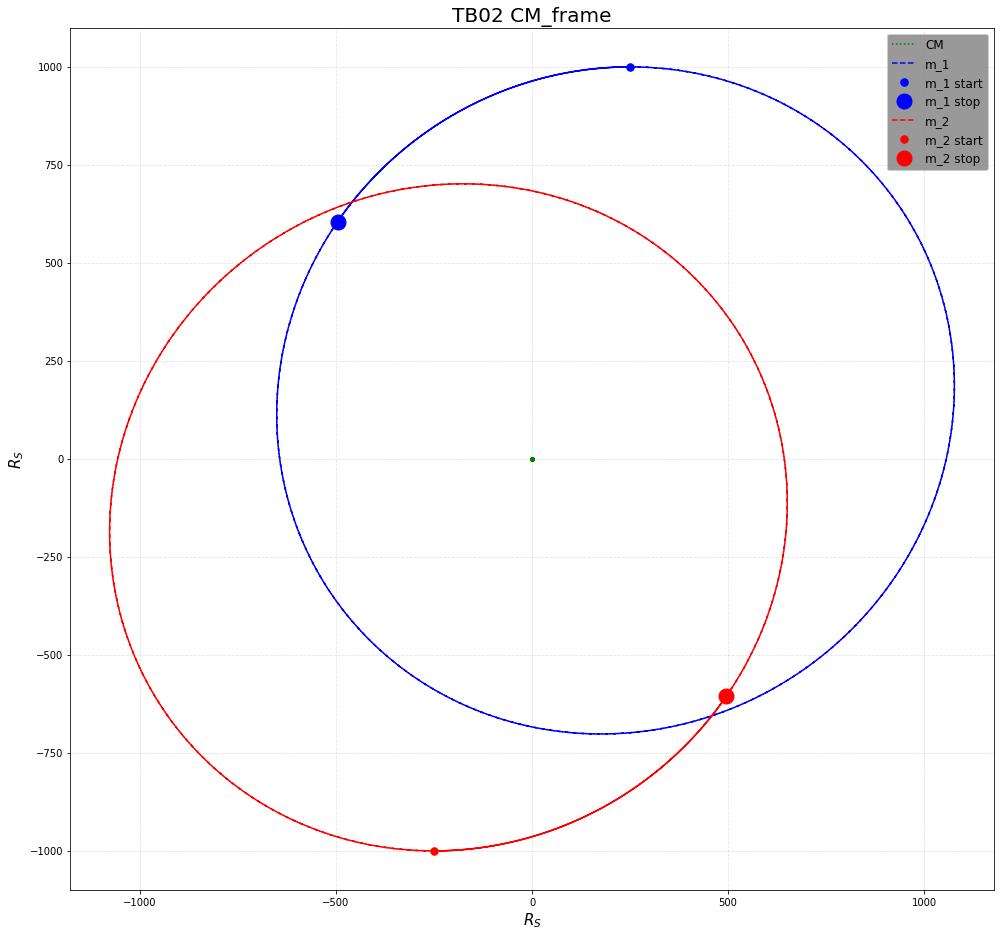

In [4]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=1000000, dt=100)
twoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=False)
twoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=False)

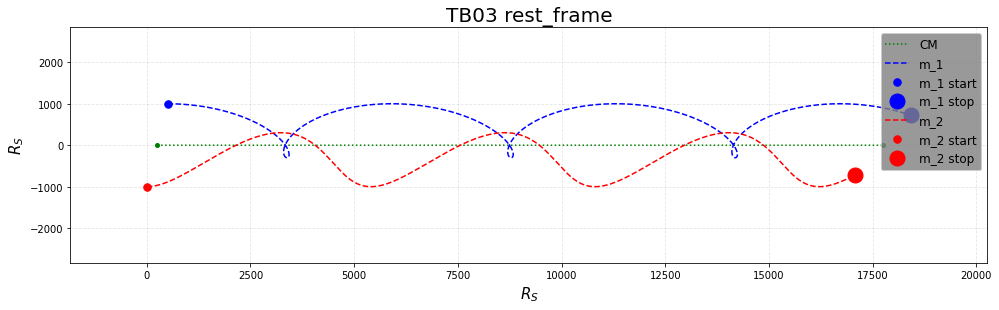

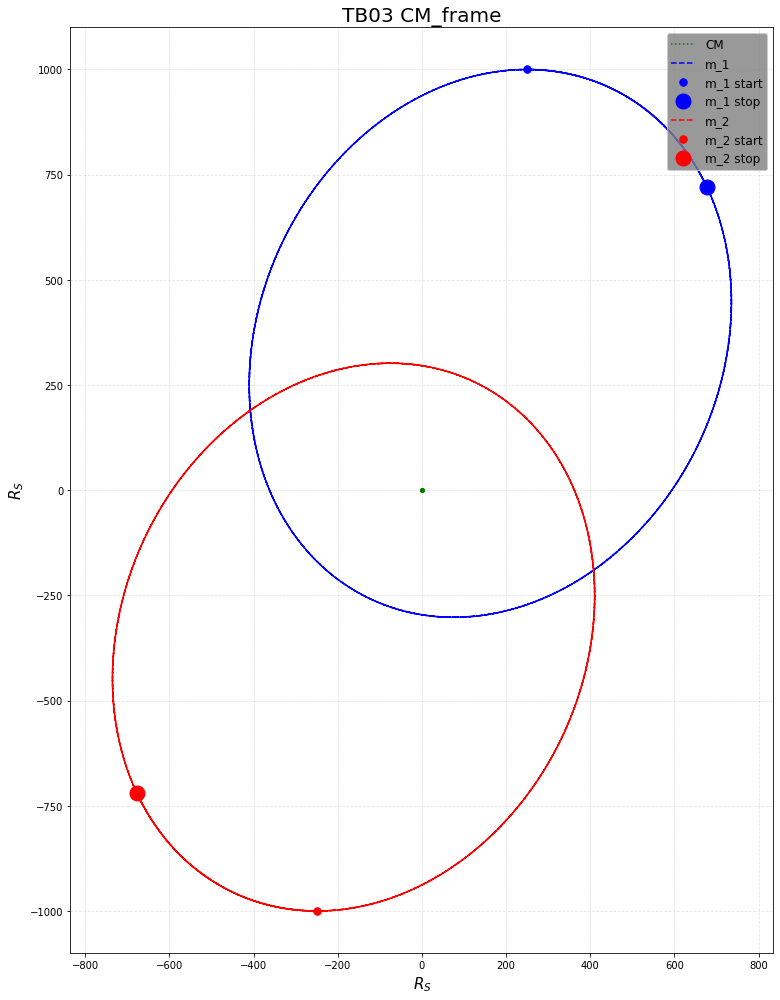

In [5]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([0.025, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=1000000, dt=100)
twoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False, save=False)
twoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True, save=False)

# TWO BODY PROBLEM EIH

In [ ]:
# This cell runs the file "Two_body_functions.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functions.ipynb

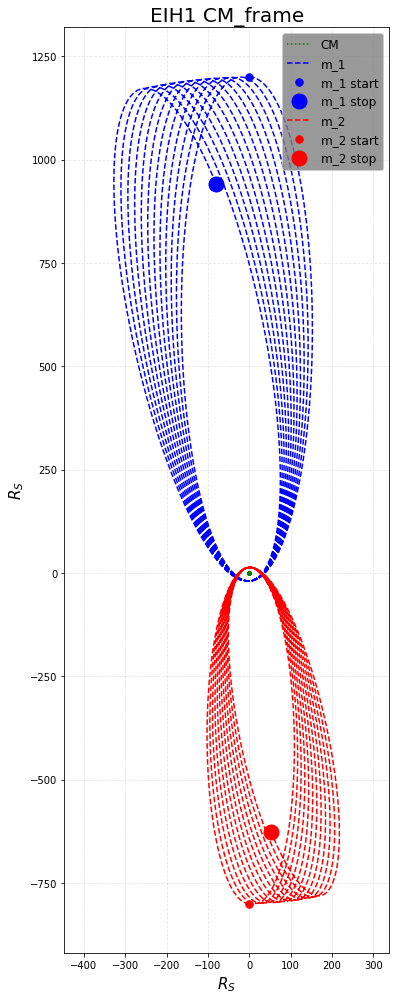

In [6]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0.,-1000.])
v_1 = np.array([0.01,  0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 500000, dt = 10)
#twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='EIH1 rest_frame', save=False)
twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH1 CM_frame', save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH1 CM_frame', save=False)

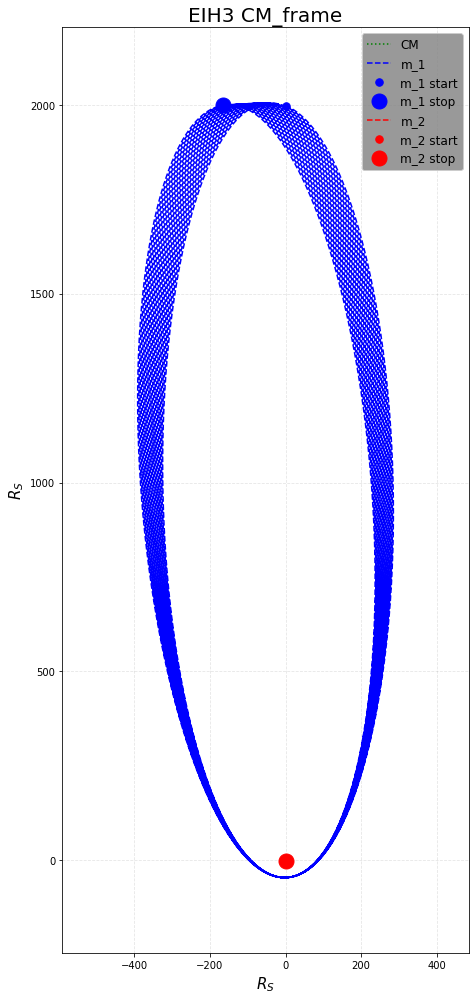

In [7]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0.,-1000.])
v_1 = np.array([0.1,  -0.01])
v_2 = np.array([-0.05, 0.05])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 1
m_2 = 1000

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 150000, dt = 1)
twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH3 CM_frame', save=False)

# ANIMATION

In [ ]:
# This cell runs the file "Two_body_functions.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functions.ipynb

In [ ]:
# x_1 = np.array([0., 1000.])
# x_2 = np.array([0.,-1000.])
# v_1 = np.array([0.05,  -0.01])
# v_2 = np.array([-0.05, 0.05])
# a_1 = np.array([0.,    0.])
# a_2 = np.array([0.,    0.])
# m_1 = 10
# m_2 = 15
# s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

# pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 450000, dt = 1)

In [ ]:
# An animation of 10s at 60 fps takes about 5  min to render
# An animation of 10s at 48 fps takes about 3½ min to render
# An animation of 10s at 24 fps takes about 1½ min to render
# An animation of 10s at 12 fps takes about ½  min to render

#twoOrbAnimator(pos1, pos2, posCM, filename='EIH3', length=10, fps=24)